### We need to select the middle position of cylinder cases and augment it
### Observation window [100*64] in middle
### [0,10,20,30,40,50] --6
### 36 x 6 = 216

In [1]:
import numpy as np

In [2]:
cases_36 = np.load("/root/autodl-tmp/HSPS/IFC/Dataset/225_cases/Test_36_cases_0418.npz")

In [3]:
cases_36.files

['tensor', 'Condition']

In [4]:
cases_36["Condition"].shape

(36, 4)

In [5]:
cases_36["Condition"][0]

array([0.00e+00, 1.05e+01, 1.15e-01, 2.01e+02])

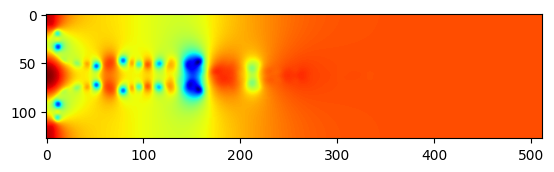

In [6]:
import matplotlib.pyplot as plt

plt.imshow(cases_36["tensor"][0,0,:,:],cmap="jet")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# 假设你的大矩形数据是 [100, 128, 512]，其中 100 是时间 
# 这里我们模拟一个随机矩阵来代表这个数据
x_center, y_center = 256, 64  # (x, y) 是中心坐标
observation_width, observation_height = 100, 64
# 获取黄色区域的边界
x_min = x_center - observation_width // 2
x_max = x_center + observation_width // 2
y_min = y_center - observation_height // 2
y_max = y_center + observation_height // 2

def Rotate_cases(data,angle=-10):
    '''
        逆时针
        input: data:[t,128,512]
        output: ob_data:[t,64,100]
    '''
    # 中间黄色区域的中心位置，假设黄色区域大小是 100x64
    
   
    # 复制原始数据，保留黄色区域
    rotated_data = data.copy()

    for t in range(data.shape[0]):  # 逐个时间步
        # 逐个处理每个时间步的数据（128x512）
        image = data[t]  # 取出某个时间步的数据
        
        # 对外部区域进行旋转
        rotated_image = rotate(image, angle, reshape=False, mode='constant')

        # 更新旋转后的数据
        rotated_data[t] = rotated_image
    
    extracted_region = rotated_data[:, y_min:y_max, x_min:x_max]
    return extracted_region

In [8]:
Angle_list= [0,-10,-20,-30,-40,-50]

In [9]:
## Augment cases

data = cases_36["tensor"]
case_numbers = cases_36["tensor"].shape[0]

Augment_tensor = np.zeros((36*6,80,64,100))
Augment_conditions = np.zeros((36*6,4))
case_n =0
for case_number in range(case_numbers):
   data = cases_36["tensor"][case_number]
   case_condition = cases_36["Condition"][case_number][-3:]
   
   for angle in Angle_list:
      
      Augment_conditions[case_n,-3:] = case_condition 
      Augment_conditions[case_n,0] = angle
      
      Augment_tensor[case_n] = Rotate_cases(data,angle)
      case_n = case_n+1
      print("case_n",case_n)

case_n 1
case_n 2
case_n 3
case_n 4
case_n 5
case_n 6
case_n 7
case_n 8
case_n 9
case_n 10
case_n 11
case_n 12
case_n 13
case_n 14
case_n 15
case_n 16
case_n 17
case_n 18
case_n 19
case_n 20
case_n 21
case_n 22
case_n 23
case_n 24
case_n 25
case_n 26
case_n 27
case_n 28
case_n 29
case_n 30
case_n 31
case_n 32
case_n 33
case_n 34
case_n 35
case_n 36
case_n 37
case_n 38
case_n 39
case_n 40
case_n 41
case_n 42
case_n 43
case_n 44
case_n 45
case_n 46
case_n 47
case_n 48
case_n 49
case_n 50
case_n 51
case_n 52
case_n 53
case_n 54
case_n 55
case_n 56
case_n 57
case_n 58
case_n 59
case_n 60
case_n 61
case_n 62
case_n 63
case_n 64
case_n 65
case_n 66
case_n 67
case_n 68
case_n 69
case_n 70
case_n 71
case_n 72
case_n 73
case_n 74
case_n 75
case_n 76
case_n 77
case_n 78
case_n 79
case_n 80
case_n 81
case_n 82
case_n 83
case_n 84
case_n 85
case_n 86
case_n 87
case_n 88
case_n 89
case_n 90
case_n 91
case_n 92
case_n 93
case_n 94
case_n 95
case_n 96
case_n 97
case_n 98
case_n 99
case_n 100
case_n 1

In [10]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Assuming Augment_tensor has dimensions [time_steps, height, width] for simplicity
# If your actual dimensions include more (like batches), you'll need to adjust the indexing accordingly.

# Set the filename for the GIF
filename = 'augmented_data.mp4'

# Create a writer object from imageio to write GIF with a specific duration per frame
writer = imageio.get_writer(filename, fps=5)  # frames per second
b = -1
# Iterate through each time step
for t in range(Augment_tensor.shape[1]):
    # Create a figure
    fig, ax = plt.subplots()
    # Display the image
    im = ax.imshow(Augment_tensor[b,t, :, :], cmap='viridis')
    ax.set_title(f"Angle: {Augment_conditions[b, 0]},D:{2*Augment_conditions[b, 1]*0.00195:.2f}(m)\n\
                 Speed:{Augment_conditions[b,2]}(m/s),Time:{(Augment_conditions[b,3]+t)*0.05:.3f}(s)")
    ax.axis('off')  # Turn off axis

    # Save the plot to a buffer instead of displaying
    plt.savefig('temp.png', bbox_inches='tight',dpi=300)
    plt.close()

    # Read the image back in
    image = imageio.imread('temp.png')
    # Append the image to the GIF
    writer.append_data(image)

# Close the writer to finish writing the GIF
writer.close()

# Remove the temporary image file
import os
os.remove('temp.png')

print(f"GIF saved as {filename}")


/tmp/ipykernel_2128/1549858860.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('temp.png')
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1548, 1130) to (1552, 1136) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


GIF saved as augmented_data.mp4


In [11]:
np.savez("/root/autodl-tmp/HSPS/IFC/Dataset/225_cases/Test_216_cases.npz", tensor=Augment_tensor, Condition=Augment_conditions)

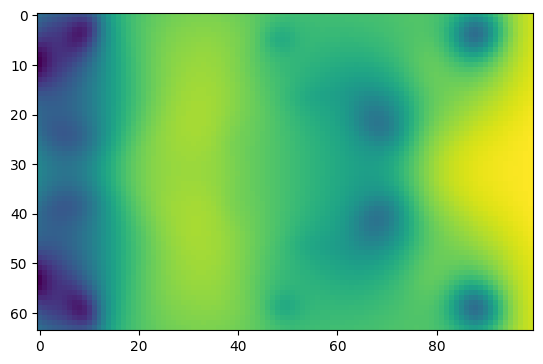

In [14]:
plt.imshow(Augment_tensor[30,1,:,:])